> """ <br>
> _Reto BootCamp telefonica 2024.<br>Bogota, Colombia. (2024-09-24)_ <br>
>_By. Valentina Chacon Sanvhez<sup>1</sup> and Andres Camilo Espitia<sup>2</sup>_
><br>
><br>
><sup>1</sup>_nicole.chacon@telefonica.com_ <br>
><sup>2</sup>_andres.espitia@telefonica.com_
><br>"""

## Introducción al reto

Finneo es un neobanco emergente con sede en Nueva York, enfocado en ofrecer servicios financieros digitales a más de 10,000 clientes en 200 ciudades de todo Estados Unidos. La compañía fue fundada hace 4 años y ha crecido rápidamente, gracias a su innovadora plataforma móvil que permite a los usuarios realizar todas sus operaciones bancarias desde sus teléfonos inteligentes, sin la necesidad de sucursales físicas.

Desde su lanzamiento, Finneo ha captado la atención de inversores y usuarios por igual, atrayendo a un gran número de nuevos clientes en el último año. De hecho, el 35% de su base actual de usuarios se unió durante el pasado trimestre, gracias a agresivas campañas de marketing y la recomendación de clientes satisfechos.

Sin embargo, a pesar de este crecimiento explosivo, **Finneo enfrenta un desafío significativo: la retención de clientes. La compañía ha registrado una tasa de abandono total del 20% al cierre del último trimestre**. Esto ha llevado a la dirección de Finneo a replantear su estrategia para mejorar la retención y la fidelidad de sus clientes.

Para abordar este desafío, los equipos de producto, marketing, análisis de datos y atención al cliente han solicitado su ayuda con su conocimiento en datos para:
1. Obtenga información a partir de los datos para comprender qué está provocando la elevada tasa de rotación de clientes.

2. Desarrolle un modelo de Machine Learning que pueda predecir con precisión cuáles clientes son más propensos a abandonar la compañía.


<figure>
<center>
<img src='https://media.licdn.com/dms/image/v2/C4E12AQFpydhHQxkq6w/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1625180951420?e=2147483647&v=beta&t=eQnycUVhn3ixmOoSKNQFVXpF9iAtwq66AmWRHRXjXFU' width="764.3312101911200" height="400" />
<figcaption></figcaption></center>
</figure>

La empresa le ha provisto con una muestra de 10,000 clientes con la que podrá realizar los objetivos planteados. A continuación se presenta una descripción de las 14 columnas que presenta la tabla

Nombre             | Tipo               | Descripcion
-------------------|--------------------|----------------------------------------------------
`Num_fila`           | Numérica           | Número de fila
`Id_cliente`         | Categórica         | Identificador único para cada cliente
`Apellido`           | Texto              | Apellido del cliente
`Puntaje_crediticio` | Númerica discreta  | Puntaje crediticio del cliente
`Pais`               | Categórica nominal | País donde el cliente reside
`Genero`             | Categórica nominal | Género del cliente
`Edad`               | Numérica discreta  | Edad del cliente
`Antiguedad`         | Numérica discreta  | Número de años que el cliente ha estado en el banco
`Balance`            | Númerica continua  | El balance de la cuenta del cliente
`Num_productos`      | Númerica discreta  | Número de productos que usa el cliente
`Tarjeta_credito`    | Binaria            | Si el cliente tiene tarjeta de crédito
`Miembro_activo`     | Binaria            | Si el clente es miembo activo
`Salario_estimado`   | Númerica continua  | Salario anual estimado del cliente
`Abandono`           | Binaria            | Si el cliente ha abandonado la empresa

## 1. Preprocesamiento y Visualización

### 1.1 Importación de librerías

In [4]:
# Librería para lectura, tratamiento, y manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Librería para visualización de datos
import seaborn as sns

# Importamos librerias para modelos de clasificación 
from Funciones_reto_bootcamp import compute_metrics, plot_confusion_matrix_and_reports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Funciones de modelamiento y métricas
# Scikit-Learn
import sklearn
from sklearn.model_selection import (
    train_test_split
)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
    MinMaxScaler,
    label_binarize
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    accuracy_score,
    recall_score,
    f1_score,
    precision_recall_curve
)
import Funciones_reto_bootcamp  as frb


### 1.2 Cargar datos desde el archivo `datos.csv` y análisis general del dataset

In [5]:
# Usa la función read_csv de pandas para leer los datos
df = pd.read_csv('datos.csv', sep=';')

# Imprime el número de filas de la tabla
print("Filas:", df.shape[0])

# Imprime el número de columnas de la tabla
print("Columnas:", df.shape[1])

# Imprime los 10 primeros registros de la tabla
df.head(10)

Filas: 10000
Columnas: 14


,Num_fila,Id_cliente,Apellido,Puntaje_crediticio,Pais,Genero,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1,1,71725.73,0


Use la función `mean` y `median` explicadas en el ejercicio del Titanic para responder:
1. ¿Cuál es el balance promedio (mean) que tienen los clientes de la muestra?

2. ¿Cuál es la mediana (median) del salario para la muestra de clientes?

<figure>
<center>
<img src='https://img.freepik.com/vector-premium/hombre-rico-pobre-concepto-riqueza-pobreza-ilustracion-vector-estilo-dibujos-animados_106788-3034.jpg?w=900' width="764.3312101911200" height="400" />
<figcaption></figcaption></center>
</figure>

In [6]:
# Aquí va su código para calcular el balance promedio de los clientes
# Calcular el balance promedio
balance_promedio = df['Balance'].mean()

# Mostrar el resultado
balance_promedio

np.float64(76485.889288)

In [7]:
# Aquí va su código para calcular la mediana del salario de los clientes
# Calcular la mediana del salario estimado
mediana_salario = df['Salario_estimado'].median()

# Mostrar el resultado
mediana_salario

np.float64(100193.915)

### 1.3 Selección de variables



Hay columnas que no generan ningún tipo de valor para análisis ni poder predictivo, como lo pueden ser códigos unicos que identifican al registro (pasajero, cliente, persona). Así mismo campos de texto (no categóricos) deben ser eliminados pues los algoritmos de Machine Learning no entienden palabras sino números.

Por favor completa la lista de columnas que deben ser eliminadas del dataset. *Pista: Son tres en total*

In [8]:
# Es importante concer un poco mas a detalle el dataset
df.describe()

,Num_fila,Id_cliente,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono
count,10000.00000,1.000000e+04,10000.000000,9567.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.874467,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.719277,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Contar la cantidad de id_cliente únicos
cantidad_id_unicos = df['Id_cliente'].nunique()

# Mostrar el resultado
cantidad_id_unicos
 
 ## Esto implica que cada una de las filas es un registro unico de cliente

10000

In [10]:
# Obtener los países únicos y su conteo, incluyendo NaN
conteo_paises = df['Pais'].value_counts(dropna=False)

# Mostrar el resultado
conteo_paises

Pais
France     4994
Germany    2498
Spain      2464
NaN          44
Name: count, dtype: int64

In [11]:
# Obtener los valores únicos de Genero y su conteo, incluyendo NaN
conteo_generos = df['Genero'].value_counts(dropna=False)

# Mostrar el resultado
conteo_generos

Genero
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
# Obtener los valores únicos de Edad y su conteo, incluyendo NaN
conteo_edades = df['Edad'].value_counts(dropna=False)

# Mostrar el resultado
conteo_edades

Edad
37.00    478
38.00    477
35.00    474
36.00    455
34.00    447
        ... 
45.25      1
82.00      1
88.00      1
85.00      1
83.00      1
Name: count, Length: 73, dtype: int64

In [13]:
# Se definen las columnas que se desea eliminar (POR FAVOR COMPLETE)
columnas_eliminar = ['Num_fila', 'Id_cliente', 'Apellido']

# Usa el método drop para borrar las columnas en la lista
df.drop(columnas_eliminar, axis=1, inplace=True)

¿Por qué decidió eliminar esas variables? Explique su selección

<H4 style = "color: blue;"> • Respuesta: </h4>

Se decide eliminar Num_fila, ya que es un atributo de orden del dataset, no de información del proyecto. La eliminación de Id:cliente 
se genera ya que es un identificador único por cada cliente y la relación de la información la tenemos asociada por cada una de las fila 
del dataset. Finalmente, la eliminación de la columna Apellido se da a causa de ser un atributo no determinante pata el modelo y tambien
por ser un campo de tipo texto.

Aunque encontramos otros atributos de tipo texto como Genero y Pais, creemos que podemos categorizarlos númericamente y los mantenemos 
por que pueden generar valor en el modelo.



In [14]:
# Verifique las columnas que componen ahora su dataset
df.head()

,Puntaje_crediticio,Pais,Genero,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### 1.4 Exploración valores faltantes e imputación

Los datos faltantes es un problema común en el día a día. A continuación, vamos a explorar cuantos datos faltantes tiene cada columna de nuestro dataset

In [15]:
# Construye una tabla con las columnas y el número de valores faltantes en estas
serie = df.isnull().sum()

# Asigna los encabezados de la tabla
serie.name = 'Valores faltantes'
serie.index.name = 'Columnas'
serie

Columnas
Puntaje_crediticio      0
Pais                   44
Genero                  0
Edad                  433
Antiguedad              0
Balance                 0
Num_productos           0
Tarjeta_credito         0
Miembro_activo          0
Salario_estimado        0
Abandono                0
Name: Valores faltantes, dtype: int64

Se observa que las variables de país y edad tienen datos faltantes. **Para este ejercicio SOLO debe asignar los valores de media y moda**. Impute con media para edad y moda para país.

La manera de calcular estos valores para las columnas fueron presentadas en el ejercicio del Titanic, y adicionalmente disponen de las plantillas



```
media_nombre_columna = df['nombre_columna'].mean()
moda_nombre_columna = df['nombre_columna'].mode()[0]
```



In [16]:
# Calcular la media de la edad
media_edad = df['Edad'].mean()

# Asigna el valor de la media a todos los valores faltantes de la edad
df['Edad'].fillna(media_edad, inplace=True)

# Convierte la columna a tipo entero
df['Edad'] = df['Edad'].astype('int64')

/tmp/ipykernel_2625/3276755999.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Edad'].fillna(media_edad, inplace=True)


In [17]:
# Calcular la moda del país
moda_pais = df['Pais'].mode()[0]

# Asignar la moda a todos los valores faltantes de la columna país
df['Pais'].fillna(moda_pais, inplace=True)

/tmp/ipykernel_2625/1124007668.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pais'].fillna(moda_pais, inplace=True)


In [18]:
## Comprobamos las imputaciones
# Construye una tabla con las columnas y el número de valores faltantes en estas
serie = df.isnull().sum()

# Asigna los encabezados de la tabla
serie.name = 'Valores faltantes'
serie.index.name = 'Columnas'
serie

Columnas
Puntaje_crediticio    0
Pais                  0
Genero                0
Edad                  0
Antiguedad            0
Balance               0
Num_productos         0
Tarjeta_credito       0
Miembro_activo        0
Salario_estimado      0
Abandono              0
Name: Valores faltantes, dtype: int64

¿Por qué se argumentaría que usamos la moda para imputar la variable País y no la media?

<h4 style = "color: blue;"> • Respuesta: </h4>

La variable Pais es de tipo categorico y no numérico. La moda es la medida de tendencia central más adecuada para variables 
categóricas, ya que representa el valor más frecuente. Por otro lado, la media es un cálculo basado en la suma de los valores dividida entre el número de elementos por tal razón se puede aplicar a Edad que es númerico pero no a Pais que es un capo de tipo texto categorico.

In [19]:
#Generamos un nuevo resumen del dataset
df.describe()

Columnas,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.836500,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.486142,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1.5 Visualizacion y EDA

#### **Averiguaremos cuántos casos de abandono (churn) están presentes en el dataset por medio de 4 caminos**

A continuación se presentan 4 pedazos de código (A, B, C, D).

El ejercicio consiste en asignar cada uno de estos códigos a los bloques que correspondan con la descripción. Le ayudaremos con un ejemplo más abajo.

Código A
```
plt.pie(df['Abandono'].value_counts(), labels=df['Abandono'].value_counts().index, autopct='%1.1f%%')
plt.show()
```

Código B
```
df['Abandono'].value_counts()/df.shape[0]*100
```

Código C
```
df['Abandono'].value_counts()
```

Código D
```
sns.countplot(x="Abandono", data=df, palette="Blues");
plt.show()
```











Como ejemplo, en el primer bloque que pide poner las cifras absolutas se le asigna el código C

In [20]:
# Obtiene las cifras absolutas de la variable de abandono
df['Abandono'].value_counts()

Abandono
0    7963
1    2037
Name: count, dtype: int64

Ahora usted...

In [21]:
# Obtiene los porcentajes de la variable de abandono (churn)
df['Abandono'].value_counts()/df.shape[0]*100

Abandono
0    79.63
1    20.37
Name: count, dtype: float64

/tmp/ipykernel_2625/723839483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Abandono", data=df, palette="Blues");


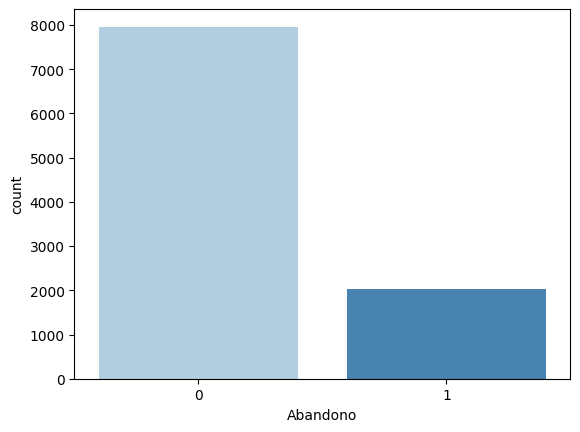

In [22]:
# Genera un diagrama de barras para la variable de abandono (churn)
sns.countplot(x="Abandono", data=df, palette="Blues");
plt.show()

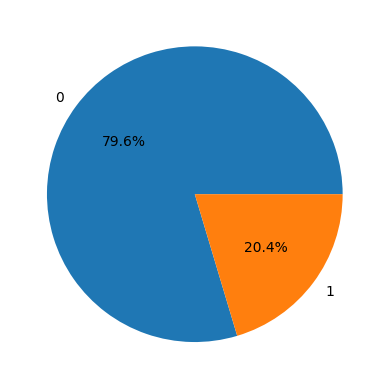

In [23]:
# Genera un diagrama de pastel para la variable de abandono (churn)
plt.pie(df['Abandono'].value_counts(), labels=df['Abandono'].value_counts().index, autopct='%1.1f%%')
plt.show()

**Interpréte el diagrama de caja y bigote de la variable de edad**

Observe el diagrama de caja y bigote


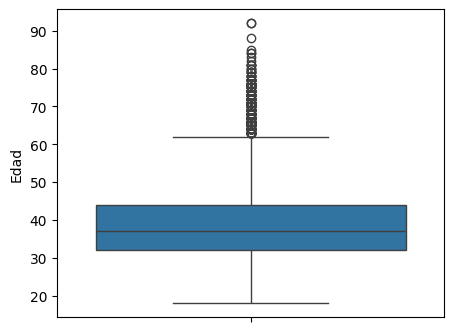

In [24]:
# Ajusta el tamaño de la imagen
plt.figure(figsize=(5,4))

# Realiza el diagrama de caja para la variable edad
sns.boxplot(y= 'Edad', data= df)

# Despliega la figura creada
plt.show()

¿Que análisis puede realizar de la variable de edad?

<span style = "color: blue;"> • Respuesta: <span>

1. El rango de edad esta entre 20 a aproximadamente 62 años, lo que indica que hay una diversidad de edades.
2. La concentración de la edad entre 32 y 45 años significa que la mayoría de los clientes son de
un grupo de edad mediana.
3. La presencia de outliers entre 60 y 90 años indica que hay algunos clientes significativamente mayores que el resto de los clientes.
Estos outliers pueden representar casos excepcionales o errores en los datos. 


**Realice un diagrama de dispersión entre las variables de Balance y el salario estimado del cliente**

Por favor asigne al parámetro `y`, dentro de la función `scatterplot`, la variable de salario.

**Pista: Revise en la tabla presentada al inicio el nombre específico de esta variable**

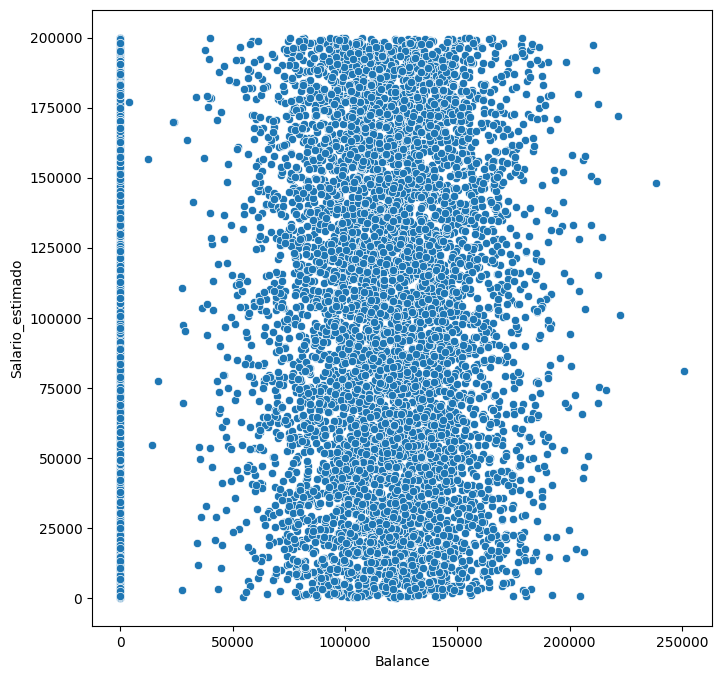

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Balance", y="Salario_estimado", data=df)
plt.show()

Basándose en la gráfica de dispersión presentada ¿Que análisis podría hacer de la relación entre las variables salario y balance?

<h4 style="color: blue;">• Respuesta: </h4>

La grafica expuesta se observa una gran cantidad de registros de el eje de las absisas _"Balance"_ que se encuentran en valor 0, y una tendencia de agrupación entre los valores de 100.000 y 150.000, con una dispercion entre los 50.000 y los 200.000. Con respecto a la variable de _"Salario Estimado"_, se observa una aparente homogeneidad en la variabilidad de los datos entre los valores de 0 a 200.000. Si se observa la nuebe de puntos resultante, se puede inducir que no existe correlación alguna (se expande en el aprtado de correlacciones), adicional  se observa que el salario estimado no puede influir dentro de el comportamiento del balance.

**Para conocer más a fondo la distribución de las variables numéricas y su relación con la variable de Abandono, se realiza un boxplot con la variable Abandono en el eje x, junto con las siguientes variables:**
1. Puntaje crediticio
2. Balance
3. Edad
4. Salario estimado

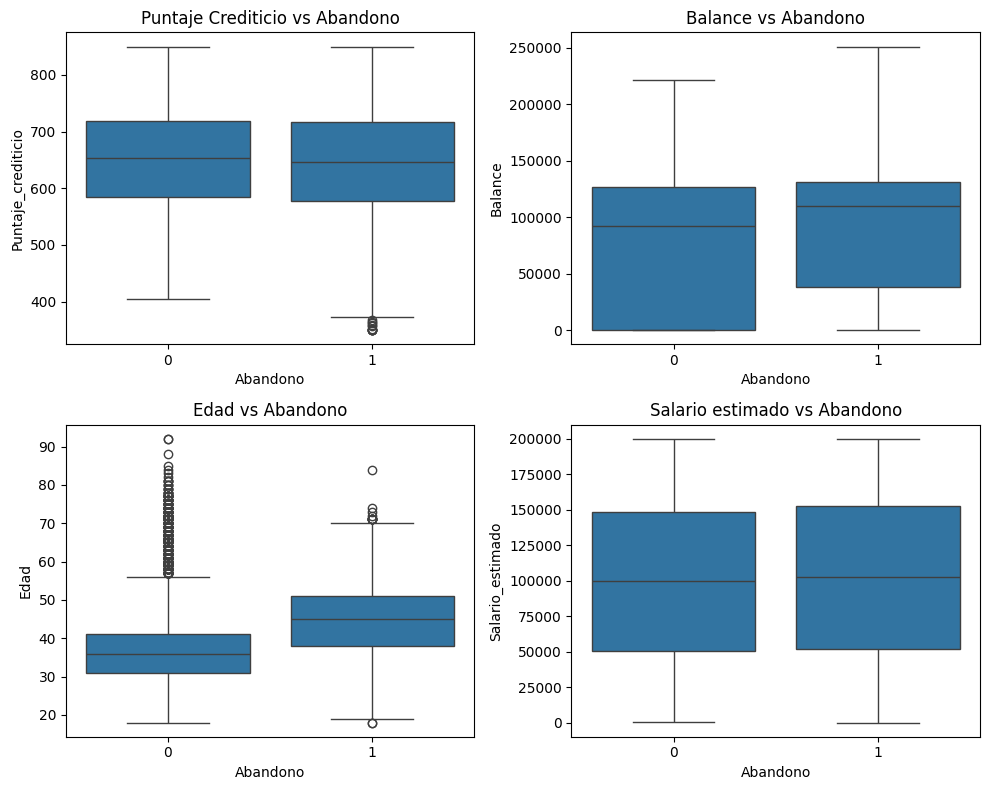

In [26]:
# Ajusta el canva para tener las cuatro gráficas
plt.figure(figsize=(10, 8))

# Grafica en el primer cuadrante el boxplot para puntaje crediticio
plt.subplot(2, 2, 1)
sns.boxplot(y="Puntaje_crediticio", x="Abandono", data=df)
plt.title("Puntaje Crediticio vs Abandono")

# Grafica en el segundo cuadrante el boxplot para Balance
plt.subplot(2, 2, 2)
sns.boxplot(y="Balance", x="Abandono", data=df)
plt.title("Balance vs Abandono")

# Grafica en el tercer cuadrante el boxplot para Edad
plt.subplot(2, 2, 3)
sns.boxplot(y="Edad", x="Abandono", data=df)
plt.title("Edad vs Abandono")

# Grafica en el cuarto cuadrante el boxplot para Salario estimado
plt.subplot(2, 2, 4)
sns.boxplot(y="Salario_estimado", x="Abandono", data=df)
plt.title("Salario estimado vs Abandono")

# Display the plots
plt.tight_layout()  # Adjusts spacing between plots to prevent overlap
plt.show()

¿A que conclusiones puede llegar teniendo los boxplot para las variables?

¿Para que variable numérica difieren más los registros de abandono y no abandono?

<h4 style="color: blue;">• Respuesta: </h4>


Se generan 4 boxplot, "<span style = "color: blue;">**Puntaje Crediticio vs Abandono** </span> ", "<span style = "color: blue;">**Balance vs Abandono**</span>", "<span style = "color: blue;">**Edad vs Abandono**</span>" y "<span style = "color: blue;">**Salario estimado vs Abandono**</span>", los insights encontrados se explican a continuación:

* <span style = "color: blue;">**Puntaje Crediticio vs Abandono**</span>: Se puede llegar a inferir que el abandono presenta una aparente normalidad frente al puntaje crediticio de manera homogenea entre cualquiera de sus valores (1- Abandono ó 0 - No Abandono), por lo tanto se puede llegar deducir que el _puntaje crediticio_ no influye de manera significativa denetro del comportamiento de la variable abandono. Adicional, sería interesante conocer la grafica de densidad del _puntaje_crediticio_ frente el _abandono_ para evaluar una presunta normalidad, así como realizar pruebas de bondad de ajuste.


* <span style = "color: blue;">**Balance vs Abandono**</span>:En este caso se observa un leve movimiento en la variabilidad de los clientes que presentan abandono respecto al incremento del balance, en comparación de aquellos que no abandonarón. Sería importante conocer si el abandono puede explicar la variabilidad en dicho comportamiento (asumiendo que abandono ⇔ balance), sin embargo, previo a esto, sería importante generar un anova (o cualquier estadistico de comparación de disperción) para lograr entender si existe una diferencia significativa entre las varianzas.


* <span style = "color: blue;">**Edad vs Abandono**</span>: Con respecto al comportamiento de la variable _Edad_ frente al _Abandono_ puede resultar un poco capcioso emitir juicios en primera instancia, pese a que se ve una mayor variabildad en la _edad_ frente al comportamiento de si abandona o no lo hace, se observa que en los casos de no abandono, existe una cantidad considerable de datos atipicos, por lo que se recomienda comparar la distribución de los graficos frente a una grafica de densidad. Adicional se puede intuir que el comportamiento de la variable de no abandonos no pertenece a un comportamiento normal (se recomienda hacer un estadistico de normalidad, como un pp plot), generando una incompetencia al utilizar metodos de comparación de distribuciones normales respecto a su disperción (como un anova), por lo que se requiere de tecnicas más complejas para el entendimiento del mismo. Con lo que respecta en la comparación de los mismos, me atrevo a insinuar con un sesgo subjetivo, que valdria validar en profundidad el comportamiento del mismo y que puede existir una leve dedución de la variabildad de la edad en caso de que abandone (nuevamente asumiendo que abandono ⇔ edad).


* <span style = "color: blue;">**Salario Estimado vs Abandono**</span>: Por ultimo, respecto al salario estimado se observa que los quartiles presentan un comportamiento homogeneo respecto a los valores de la variable abandono, sería interesante poder validar en la nube de puntos (scaterplot) si no se observa comportamiento alguno (o en su defecto con una correlación como la de spearman), para poder afirmar que no existe explicación alguna en el salario estimado frente el abandono.

Para este caso se recomienda realizar una redución de dimencionalidad previo a la realización del modelo para evitar el _overfiting_ en caso de que la variabilidad intravariables pueda ser explicada por otras variables, esto por lo visto en los cuadrantes I, II, IV.


**Finalmente, visualice la matriz de correlación para las variables numérica como un heatmap, tal como se hizo en el ejercicio del Titanic**

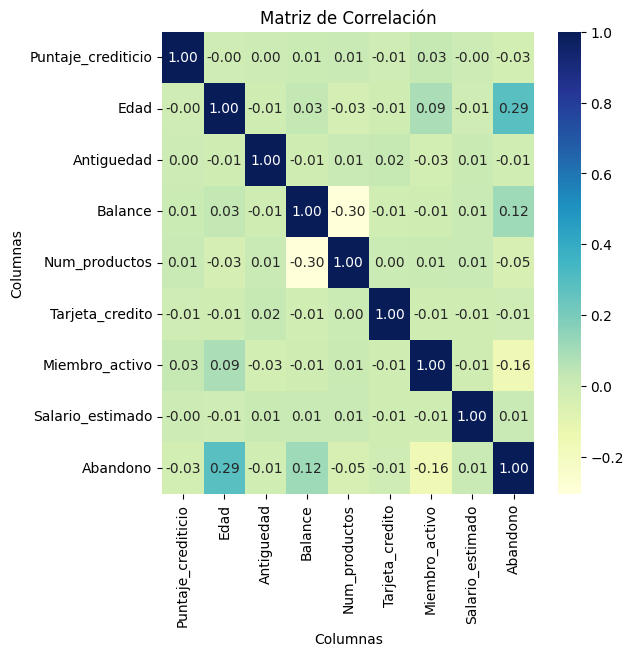

In [27]:
# Selecciona solo columnas numéricas
numeric_data = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

¿Cuál es el par de variables que más se correlaciona positivamente y negativamente?

Mayor correlación positiva: La correlación más alta es entre la variable Edad y Abandono, con un valor de 0.29. Esto indica que a medida que aumenta la edad, la probabilidad de abandono tiende a aumentar.

Mayor correlación negativa: La correlación mas baja es entre Balance y Num_productos, con un valor de -0.30. Esto indica que a medida que el balance aumenta, el número de productos disminuye.

### 1.6 One-Hot Encoding

Buscamos aplicar la técnica convirtiendo las categorias de estas columnas en columnas binarias con unos y ceros.

**Por favor complete la lista `categorical_vars` con la otra variable categórica restante asociada al género.**

In [28]:
# Define las variables categóricas que se codificarán con one-hot encoding
categorical_vars = ['Pais','Genero']

# Definimos el tipo de las columnas binarias
tipo_binarias = 'int'

# Aplica la codificación one-hot a las variables categóricas especificadas
df = pd.get_dummies(df, columns=categorical_vars, dtype=tipo_binarias)

In [29]:
df.head()

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono,Pais_France,Pais_Germany,Pais_Spain,Genero_Female,Genero_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [30]:
# Define las columnas a eliminar por redundancia
columnas_eliminar = ['Genero_Male', 'Pais_Spain']

# Se eliminan las columnas definidas con la función drop
df = df.drop(columns=columnas_eliminar)

# Muestra los primeros registros del dataset para verificar las columnas
df.head()

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono,Pais_France,Pais_Germany,Genero_Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## 2. Sección de Modelado de Clasificación

En esta sección, deberá ejecutar al menos un modelo de clasificación. Algunos de los modelos más populares y ampliamente utilizados incluyen la **regresión logística**, **árboles de decisión**, y **bosques aleatorios (Random Forest)**. Le proporcionaremos una guía inicial para implementar uno de estos modelos. Además, se espera que seleccione y aplique al menos un algoritmo adicional de clasificación.

Después de implementar estos modelos, realice el cálculo de las métricas de rendimiento para cada uno y determine cuál considera que es el mejor modelo para responder a nuestra pregunta de negocio. Fundamente su elección en los resultados obtenidos.



Antes de comenzar con los modelos adicionales, primero le mostraremos cómo ejecutar un modelo de **Árbol de decisión**. Esta guía paso a paso le servirá como base para comprender los procesos involucrados en la configuración y evaluación de modelos de clasificación.

Después de implementar el árbol de decisión,  deberá seleccionar y aplicar al menos un algoritmo adicional de clasificación. Algunas opciones recomendadas incluyen **regresión lógistica** y **bosques aleatorios (Random Forest)**.

Finalmente, realice el cálculo de las métricas de rendimiento para cada modelo y determine cuál es el más adecuado para responder a nuestra pregunta de negocio basándose en los resultados obtenidos.


**2.1 En esta sección puede observar como esta nuestro dataset antes de realizar la separación en entrenamiento y test**.

In [31]:
df.head()

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Abandono,Pais_France,Pais_Germany,Genero_Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Le mostramos como se debería ver su dataset hasta el momento como una herramienta para que pueda comparar**

In [32]:
df.size

120000

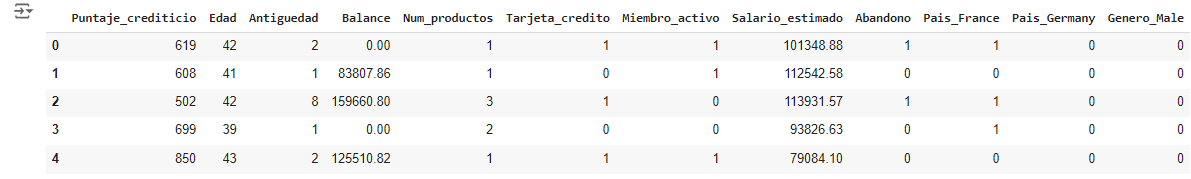

In [33]:
display(Image('imagenes/img01.png'))


**2.2 División del dataset en entrenamiento y prueba**

Dentro de las comillas debe colocar el nombre de la variable que desea predecir, recuerde que se trata del churn y es muy importante definir de manera adecuada esta variable ya que con esto podemos llegar a tomar decisiones estratégicas.

In [34]:
# Separar características y variable objetivo
# La variable que se desea predecir es la de abandono. 
X = df.drop(columns=['Abandono'])
y = df['Abandono']

In [35]:
# Dividir en conjunto de entrenamiento y prueba
porc_conjunto_prueba = 0.2
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=porc_conjunto_prueba, random_state=123)

**¿Considera adecuada una división de 20% para test y 80% para entrenamiento de acuerdo al código anterior?**

Justifique su respuesta aqui:

Esta división es la mas comunmente usada, también se debe considerar el tamaño del data set y finalmente se debe validar el modelo y solo hasta este punto estaremos seguros si fue el ideal o si fue una división adecuada. Por ahora es una muy buen opción comenzar con esta división y mas adelante ir experimentando en otros porcentajes en caso de tener una mala metrica de exito del modelo.

El 80% del conjunto de datos ofrece una muestra amplia para que el modelo aprenda patrones relevantes y generalice mejor.

El 20% para pruebas permite evaluar adecuadamente el desempeño del modelo sin comprometer la diversidad de los datos de prueba.


**¿Cómo cree que podría afectar una división diferente del conjunto de datos, como un 70% para entrenamiento y un 30% para pruebas, a la precisión y generalización del modelo?**

Justifique su respuesta aqui:

<h4 style = "color: blue;">• Respuesta: </h4>

Consideramos que esta división puede llegar a tener mejor precisión ya que habrian mas datos de prueba el 30 % ya que evaluara con mas muestras a comparación que la división 20-80. Sin embargo con menos datos de entrenamiento, el 70% el modelo podria tener menos informacion para encontrar patrones y ajustar el modelo, esto significa que el modelo podría no generalizar tan bien como se espera.  Nuevamente, estas ventajas o desventajas solo se podrán veevidenciar al final del modelo, en donde según las metricas y el objetivo del modelo se puede tener la decisión de cambiar o no las divisiones ya que esto se ve reflejado si los patrones son muy complejos o si los datos son escasos, o entre otras...

In [36]:
X_entreno.head()

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Pais_France,Pais_Germany,Genero_Female
9216,724,30,10,0.00,2,1,1,54265.55,1,0,0
7324,607,39,10,0.00,3,1,0,132741.13,1,0,1
918,784,35,3,0.00,2,0,0,81483.64,0,0,0
5902,694,38,9,0.00,2,1,0,40463.03,1,0,0
2807,705,33,3,144427.96,2,1,0,113845.19,1,0,0


**Después de haber realizado la separación de su dataset de entrenamiento así debería visualizarse, úselo como una guía para el ejercicio que está desarrollando**  

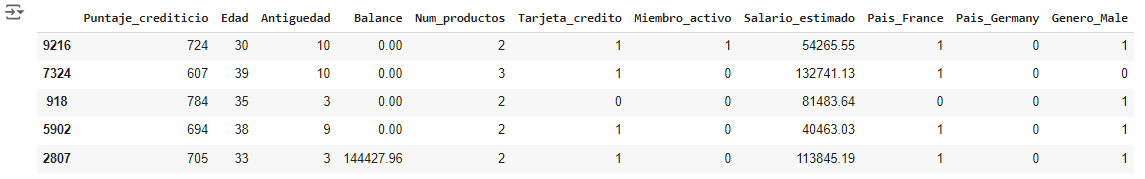

In [37]:
display(Image('imagenes/img02.png'))

**¿Cuantos datos para entrenamiento (train) tiene después de realizar la división?**

In [38]:
#Inserte su código aqui
X_entreno.shape

(8000, 11)

In [39]:
X_prueba.head()

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Pais_France,Pais_Germany,Genero_Female
2656,779,34,5,0.00,2,0,1,111676.63,0,0,1
445,748,26,1,77780.29,1,0,1,183049.41,1,0,1
9505,651,28,10,79562.98,1,1,1,74687.37,1,0,0
332,663,44,2,117028.60,2,0,1,144680.18,0,1,0
4168,516,37,8,0.00,1,1,0,101834.58,1,0,0


**Después de haber realizo la separación de su dataset de prueba así debería visualizarse, úselo como una guía para el ejercicio que está desarrollando**

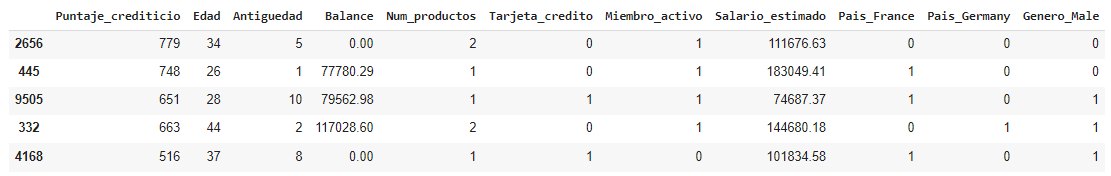

In [40]:
display(Image('imagenes/img03.png'))

**¿Cuantos datos para probar (test) tiene después de realizar la división?**

In [41]:
#Inserte su codigo aqui
X_prueba.shape

(2000, 11)

**¿Qué puede observar que cambio respecto a la sección 2.1?**

Justifique su respuesta aqui:

In [42]:
df.shape

(10000, 12)

<h4 style = "color: blue;"> • Respuesta: </h4>

El primer cambio y el más considerable que se puede observar a simple vista, tiene que ver con las dimensiones de las matrices.
La matriz de datos contiene un total de 10.000 variables con  12 atributos, al particionar los datos con una distribucción 80-20, se observa que mantiene la proporción teniendo que para la base de entreno se tienen 10.000 variables con 11 atributos y 2.000 variables con 11 atributos (disminución en la dimencionalidad de atributos por la substracción de la columna de _abandono_)

>''' py <br>
> df.shape : (10000, 12) <br>
> X_entreno.shape : (8000, 11) <br>
> X_prueba.shape : (2000, 11) <br>
'''


**2.5 Preparando el Modelo**

# **Árboles de Decisión**

<figure>
<center>
<img src='./imagenes/decision_tree.png' width="600" height="300" />
<figcaption></figcaption></center>
</figure>

Un **árbol de decisión** es un modelo de aprendizaje automático utilizado para tareas de clasificación y regresión. En problemas de **clasificación binaria**, se usa para predecir a qué una de dos clases pertenece una muestra.

## Demostración de un Árbol de Decisión

En la siguiente sección, te mostraremos cómo se comporta un árbol de decisión al ser aplicado a nuestros datos. Exploraremos cómo este modelo toma decisiones y evalúa sus resultados, proporcionando una visión clara de su funcionamiento y eficacia.


**2.5.1 Ajuste del modelo de árbol de decisión**

En esta sección se presenta la forma en la cual se define un modelo de arbol de decisión (DecisionTreeClassifier), en este paso se debe utilizar el dataset de entrenamiento (X_entreno) Junto con ka variable que se requiere predecir (y_entreno), esto debido a que el modelo requiere aprender sobre estos datos para luego ser validados en el cojunto que queremos probar (X_prueba).

In [43]:
# Entrenar el árbol de decisión con un límite de profundidad
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_entreno, y_entreno)

DecisionTreeClassifier(max_depth=3, random_state=0)

**2.5.2 Predicción con el dataser de entrenamiento y prueba**

Una vez que el modelo ya ha logrado entender los datos del dataset de entrenamiento requerimos validarlo con nuestro dataset de prueba (X_prueba), para ello utilizamos la función **predict**

In [44]:
# Predicciones
y_pred_entreno_dt = clf.predict(X_entreno)
y_pred_prueba_dt = clf.predict(X_prueba)

**2.5.3 Matrices de confusión**

Una matriz de confusión es una tabla que te permite visualizar el rendimiento de un modelo de clasificación. Muestra cuántas predicciones fueron correctas e incorrectas, separadas por cada clase (Abandono, No abandono)

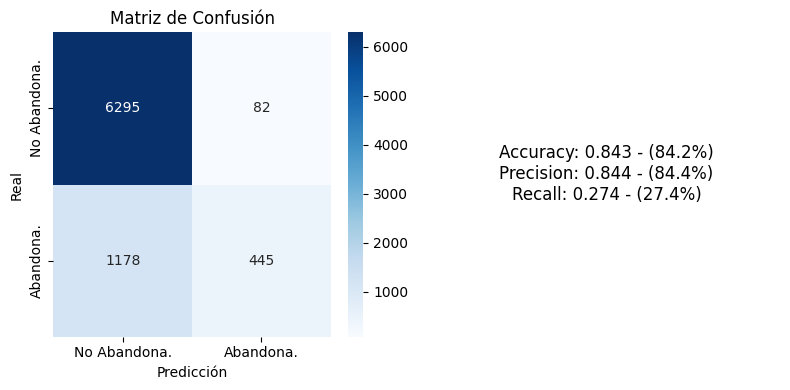

In [45]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
frb.plot_confusion_matrix_and_reports(y_entreno,y_pred_entreno_dt )

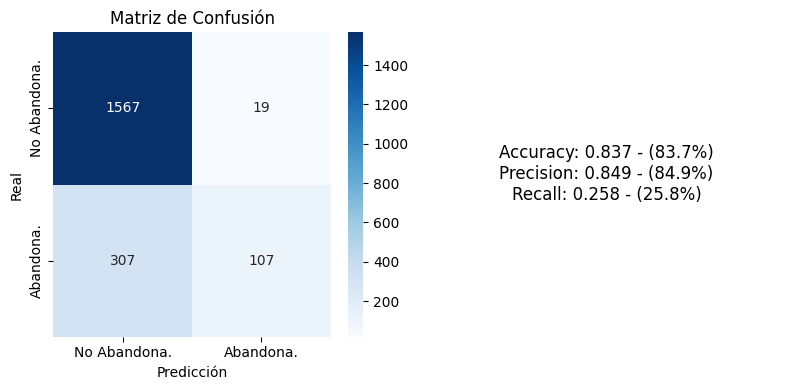

In [46]:
frb.plot_confusion_matrix_and_reports(y_prueba, y_pred_prueba_dt)

- **¿Qué significa que la precisión de "Abandona" sea tan bajo?**

Justifique su respuesta aqui:

<h4 style = "color: blue;"> • Respuesta: </h4>

De manera tecnica quereria dercir que la calidad de la predicción no es tan buena. Esto puede tener una gran incidencia en el modelo puesto que la variable que tiene un mayor peso en nuestro ejercicio es entender si se va a abandonar y en que clientes debe invertir Finneo para poder costear la retención, sin embargo para este caso, se puede pasar de un alto valor en el _score_ del  _presision_, puesto que aunque pueda aumentar los recursos gastados, es más importante tener la mayor cantidad de clientes dentro del paquete de predicciones de "abandona" ( en este caso se recomienda revisar más el _recall_)

 - **¿El modelo está cometiendo muchos falsos negativos o falsos positivos?**

Justifique su respuesta aqui:

<h4 style = "color: blue;"> • Respuesta: </h4>

El modelo esta identificando 82 falsos negativos y 1178 falsos positivos, lo cual significa que 1260 datos de 8000, es decir, el 15.75% de los datos estan siendo mal calificados en el conjunto de entrenamiento.

El modelo esta identificando 19 falsos negativos y 309 falsos positivos, lo cual significa que 326 datos de 2000, es decir, el 16.3% de los datos estan siendo mal calificados en el conjunto de pruebas.

La definición de 'muchos' es muy subjetiva, sin embargo, por estrategia de negocio, es mejor abordar a un cliente que el modelo predice que 'abandona'' aunque en realidad 'no abandona'. Y los casos en los que predice que se el cliente 'no abandona' y en realidad si lo hace, son bajos, hablamos de 82 y 19 clientes respectivamente para entrenamiento y pruebas. 

- **¿Qué tan confiable es el modelo para predecir si alguien no abandona?**

Justifique su respuesta aqui:

<h4 style = "color: blue;"> • Respuesta: </h4>

Se podría deducir que el modelo es "bueno" a la hora de medir clientes que abandonan. Como se abordo previamente se establece que el _recall_ debería ser la metrica más importante de medir en este ejercicio; particularmente se puede decir que un 84,9% es un valor aceptable (al indicar que una gran cantidad de los clientes se encuentra dentro de la bolsa de clientes identificados como Verdaderos positivos (abandonos que abandonaron))

**2.6 Variables más importantes en el modelo**

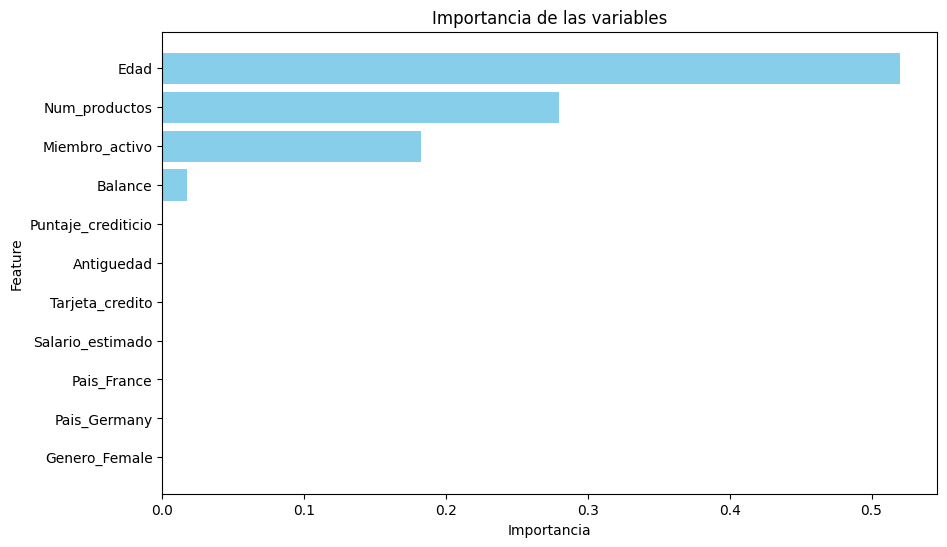

In [47]:
# Crear el dataset con las importancias de las variables
feature_importances = pd.DataFrame({'Feature': X_entreno.columns, 'Importance': clf.feature_importances_})

# Ordenar las variables por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title('Importancia de las variables')
plt.gca().invert_yaxis()
plt.show()



**¿Por qué la edad es la variable más importante en el modelo?**

Justifique su respuesta aqui:

<h4 style = "color: blue;"> • Respuesta: </h4>

Consideramos que es clave ya que desde la tabla de correlacion detectamos que tiene una correlaciión directa con el abandono, aunque no es muy alta, se vueleve una variable importante en la toma de decisiones. Esto también se puede fundamentar desde el putno de vista del negocio, dando a entender que es una variable que captura muchas diferencias clave en los comportamientos y necesidades de los clientes.

**A pesar de que uno podría pensar que el "Balance" de una persona sería un factor importante para predecir el abandono, en este modelo parece tener una baja importancia. ¿Por qué crees que sucede esto?**

Justifique su respuesta aqui:

<h4 style = "color: blue;"> • Respuesta: </h4>

De acuerdo con lo previsualizado en el analisis exploratorio (principalmente el capitulo 1.5), se observa que puede que la variable no permita redecir la variabilidad frente a la variable de _abandono_ (principalmente observado en el bloque de bocplot), por lo que es un primer indicio de que puede no ser representativa para el modelo, por otra parte, puede que el balance del saldo del cliente no influya debido a que los clientes abandonan por otros productos con un caracter mucho más macrosocial (como lo es el caso de la edad), o en perse de la fidelidad del cliente respecto a la marca (como lo puede ser si es un miembro activo o el número de productos que poseen los clientes en neobank)

![Descripción de la imagen](https://cdn.memegenerator.es/descargar/884104)



**Es probable que si llegaste hasta este punto tengas dudas o inquietudes, sin embargo, recuerda que es posible contactarnos y podemos resolver todas esas preguntas que probablemente han surgido a lo largo del proceso.**

# Reto de Modelamiento

![Descripción de la imagen](https://www.descargarstickers.com/src_img/2020/05/474653.png)


# **Reto de Machine Learning: ¡Acepta el Desafío!**

---

### 1. Entrenamiento de Modelos Adicionales

Te pedimos que, si deseas aceptar este reto y has llegado hasta acá, entrenes **al menos un modelo adicional de Machine Learning**:

- **Regresión Logística**: Un modelo simple pero efectivo para tareas de clasificación.
- **Random Forest**: Un modelo de conjunto poderoso que combina múltiples árboles de decisión.

Para esto, puedes utilizar todos los pasos que seguiste en las secciones **2.5** y **2.6**

---

### 2. Evaluación del Modelo: Matriz de Confusión

Después de entrenar el modelo, deberás calcular la **matriz de confusión** y **evaluar** su rendimiento. En particular:

- Calcula la **precisión** y el **recall** del modelo resultante.
- Interpreta los resultados obtenidos para entender cómo de bien están funcionando tus modelos.

---

### 3. Importancia de las Características

Una vez que tengas el modelo entrenado, es importante que calcules la **importancia de las características**:

- **Interpreta las 3 características más importantes** de cada modelo y analiza cómo influyen en la predicción de los resultados.

---

### 4. Selección del Mejor Modelo

Al finalizar, deberás **elegir el modelo que mejor se ajuste** (incluso el modelo guía de árbol de decisión que te hemos mostrado) a la necesidad que estamos tratando de resolver: la **predicción de churn** (abandono de clientes). Justifica tu elección basándote en el desempeño de los modelos.

---

### 5. Reflexión: Mejoras Potenciales

Si consideras que los modelos entrenados no son lo suficientemente buenos, cuéntanos:

- **¿Por qué crees que los modelos no rinden lo suficiente?**
- **¿Qué acciones tomarías para mejorar el rendimiento de los modelos?**

---

### ¡Buena suerte con el desafío!



### Pista: Te relacionamos el ajuste para los modelos de clasificación recomendados:

- Regresión logística:**LogisticRegression()**
  
- Random Forest: **RandomForestClassifier()**

**Importancia de las variables**

En la variable **coefficients** debes cambiar el nombre model por el nombre que le asignaste al modelo de regresión logística en caso de que lo hayas elegido

In [48]:
# Dividir en conjunto de entrenamiento y prueba para el modelo de regresion
porc_conjunto_prueba = 0.2
X2_entreno, X2_prueba, y2_entreno, y2_prueba = train_test_split(X, y, test_size=porc_conjunto_prueba, random_state=123, stratify=y)

In [49]:
# Entrenar modelo de regresion
model = LogisticRegression()
model.fit(X2_entreno, y2_entreno)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
#model_rf = RandomForestRegressor() #<-- Regresion task in which we achive a continuous output
model_rf = RandomForestClassifier() #<-- Regresion task in which we achive a continuous output
model_rf.fit(X2_entreno, y2_entreno)

RandomForestClassifier()

In [60]:
# Predicciones 
y_pred_entreno_lr = model.predict(X2_entreno)
y_pred_prueba_lr = model.predict(X2_prueba)

# Resultados
Resultados = X2_entreno.copy()


# Predicciones 
y_pred_entreno_rf = model_rf.predict(X2_entreno)
y_pred_prueba_rf = model_rf.predict(X2_prueba)

# Resultados
Resultados_rf = X2_entreno.copy()


print(f'Resultados regreción logistica: \n {Resultados}')

print(f'Resultados Random Forest: \n {Resultados_rf}')

Resultados regreción logistica: 
       Puntaje_crediticio  Edad  Antiguedad    Balance  Num_productos  \
9385                 687    44           8   95368.14              2   
2155                 660    35           6  100768.77              1   
768                  684    41           2  119782.72              2   
6082                 725    38           8  104149.66              1   
2926                 510    63           8       0.00              2   
...                  ...   ...         ...        ...            ...   
926                  738    35           3       0.00              1   
7779                 757    46           0       0.00              2   
729                  499    57           1       0.00              1   
9719                 516    47           9  128298.74              1   
721                  459    42           6  129634.25              2   

      Tarjeta_credito  Miembro_activo  Salario_estimado  Pais_France  \
9385                1        

In [61]:
# ahora es posible realizar la predicción en nuestros datos
Resultados['Probabilidad_Abandono']  = model.predict_proba(X2_entreno)[:, 1] #<--Modelos boolenos
Resultados['Prediccion_Abandono'] = y_pred_entreno_lr


Resultados_rf['Probabilidad_Abandono']  = model_rf.predict(X2_entreno) #<--Modelos continuos
Resultados_rf['Prediccion_Abandono'] = y_pred_entreno_rf



In [62]:
Resultados.head(15)

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Pais_France,Pais_Germany,Genero_Female,Probabilidad_Abandono,Prediccion_Abandono
9385,687,44,8,95368.14,2,1,1,1787.85,0,1,0,0.227695,0
2155,660,35,6,100768.77,1,1,0,19199.61,1,0,1,0.226264,0
768,684,41,2,119782.72,2,0,0,120284.67,0,0,0,0.180097,0
6082,725,38,8,104149.66,1,1,0,62027.90,0,1,0,0.271502,0
2926,510,63,8,0.00,2,1,1,115291.86,1,0,0,0.479533,0
9809,820,39,1,104614.29,1,1,0,61538.43,1,0,1,0.109210,0
8517,688,20,8,137624.40,2,1,1,197582.79,1,0,0,0.024903,0
8757,678,44,2,98009.13,2,0,1,31384.86,0,1,1,0.234776,0
7914,687,35,9,0.00,2,0,1,73133.82,1,0,0,0.075399,0
1466,633,29,7,169988.35,1,1,0,4272.00,1,0,1,0.212784,0


In [63]:
Resultados_rf.head(15)

,Puntaje_crediticio,Edad,Antiguedad,Balance,Num_productos,Tarjeta_credito,Miembro_activo,Salario_estimado,Pais_France,Pais_Germany,Genero_Female,Probabilidad_Abandono,Prediccion_Abandono
9385,687,44,8,95368.14,2,1,1,1787.85,0,1,0,0,0
2155,660,35,6,100768.77,1,1,0,19199.61,1,0,1,0,0
768,684,41,2,119782.72,2,0,0,120284.67,0,0,0,0,0
6082,725,38,8,104149.66,1,1,0,62027.90,0,1,0,0,0
2926,510,63,8,0.00,2,1,1,115291.86,1,0,0,0,0
9809,820,39,1,104614.29,1,1,0,61538.43,1,0,1,1,1
8517,688,20,8,137624.40,2,1,1,197582.79,1,0,0,0,0
8757,678,44,2,98009.13,2,0,1,31384.86,0,1,1,0,0
7914,687,35,9,0.00,2,0,1,73133.82,1,0,0,0,0
1466,633,29,7,169988.35,1,1,0,4272.00,1,0,1,0,0


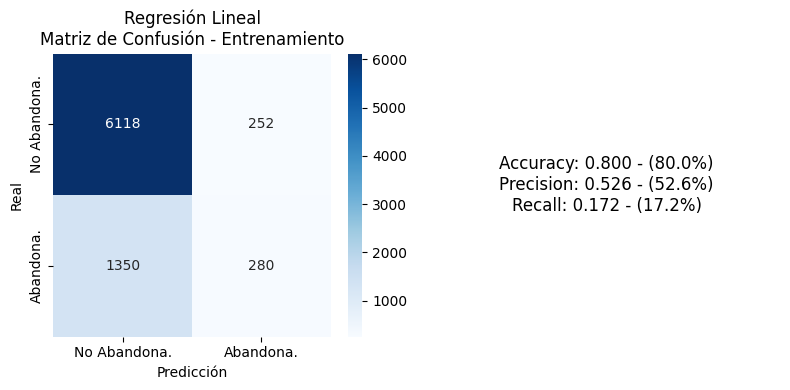

In [64]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrix_and_reports(y2_entreno, y_pred_entreno_lr, title = 'Regresión Lineal\nMatriz de Confusión - Entrenamiento')

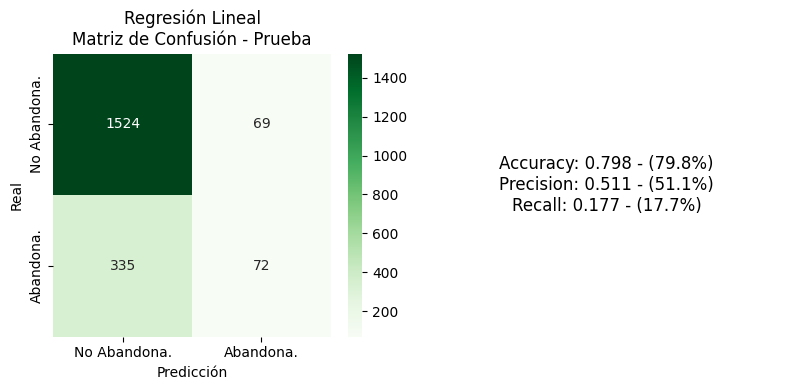

In [65]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrix_and_reports(y2_prueba, y_pred_prueba_lr, title = 'Regresión Lineal\nMatriz de Confusión - Prueba', cmap=plt.cm.Greens )



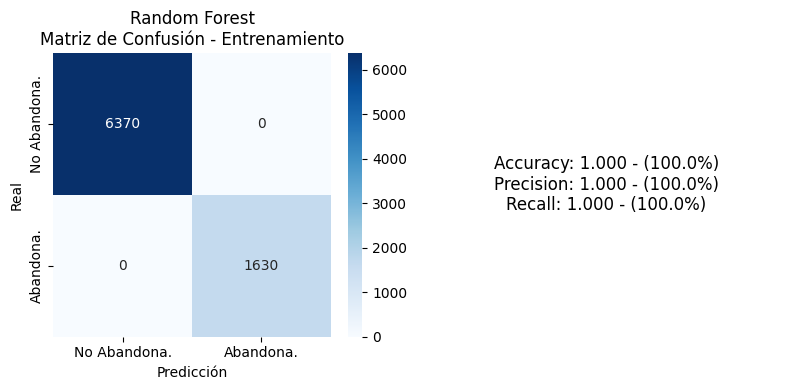

In [66]:
plot_confusion_matrix_and_reports(y2_entreno, y_pred_entreno_rf, title = 'Random Forest\nMatriz de Confusión - Entrenamiento')



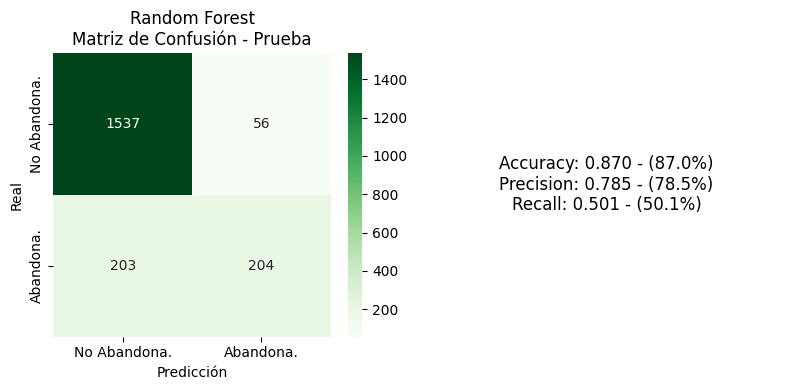

In [72]:
plot_confusion_matrix_and_reports(y2_prueba, y_pred_prueba_rf, title = 'Random Forest\nMatriz de Confusión - Prueba', cmap=plt.cm.Greens )


<h4 style = "color: blue;"> • Interpretación: </h4>

Para el caso de la <span style = "color: blue;">**Regresión Lineal**</span>, se observa números que se pueden considerar demasiado bajos en el _recall_, en este caso se puede llegar a inferir que el modelo puede no ser el optimo para intentar predecir los clientes que tienen una alta probabilidad de abandono, que al final son aquellos que fineo desea impactar.

Para el caso del <span style = "color: blue;">**Random Forest**</span>, se observa que en las tres metricas son mejores (por lo menos que los otrso dos casos visualizados), sin embargo como se explico previamente, para el caso el _recall_ que es la medida que debería ser considerada, es baja, en donde le modelo predice que _"No Abandona"_ cuando en el test se observa que si lo hace, con un total de 203 clientes, lo cúal es 1,01% de los clientes que se utilizarón para la prueba y un 49,9% de los que abandonan (_Recall'_ )


## 3. Importancia de las Características

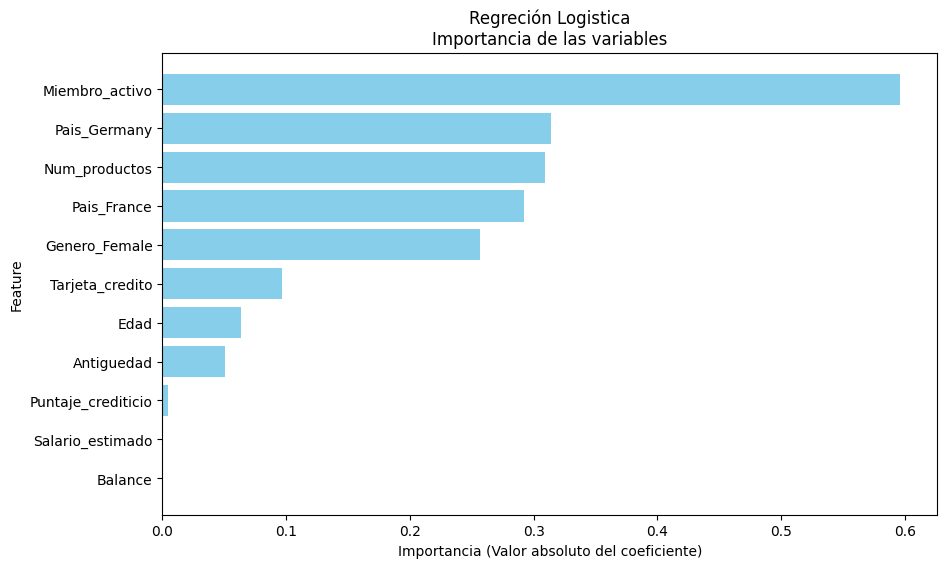

In [74]:
# Obtener los coeficientes
coefficients = model.coef_[0]

# Crear el dataset con las importancias de las variables
feature_importances = pd.DataFrame({'Feature': X2_entreno.columns, 'Importance': np.abs(coefficients)})

# Ordenar las variables por importancia (valor absoluto del coeficiente)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia (Valor absoluto del coeficiente)')
plt.ylabel('Feature')
plt.title('Regreción Logistica\nImportancia de las variables')
plt.gca().invert_yaxis()
plt.show()


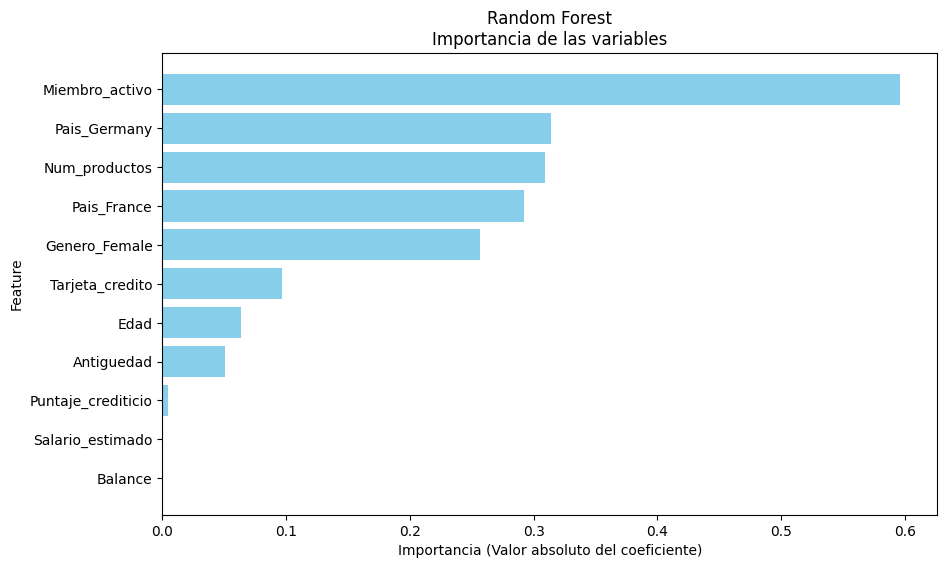

In [84]:
"""
    Nota:
    Lo mejor es visualizar en el grafico de ramas, se hace en grafico de barras en esta ocación para poder comparar
"""

# Obtener los coeficientes
#coefficients = model_rf.coef_[0] -<-- it is not a linear model, we need use [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
coefficients_rf = model_rf.feature_importances_
# Crear el dataset con las importancias de las variables
feature_importances_rf = pd.DataFrame({'Feature': X2_entreno.columns, 'Importance': np.abs(coefficients)})

# Ordenar las variables por importancia (valor absoluto del coeficiente)
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia (Valor absoluto del coeficiente)')
plt.ylabel('Feature')
plt.title('Random Forest\nImportancia de las variables')
plt.gca().invert_yaxis()
plt.show()

In [80]:
# Métricas para Regresión Logística
metrics_lr = compute_metrics(y2_prueba, y_pred_prueba_lr)

# Métricas para Decision Tree
metrics_dt = compute_metrics(y_prueba, y_pred_prueba_dt)

# Métricas para Random Forest
metrics_rf = compute_metrics(y2_prueba, y_pred_prueba_rf)

In [82]:
# Creación de un DataFrame unificado con las métricas de cada modelo construido
models_summary = pd.DataFrame({
    'Model': ['Logistic Regression',  'Decision Tree', 'Random_Forest'],
    'Accuracy Test': [metrics_lr['accuracy'][0], metrics_dt['accuracy'][0], metrics_rf['accuracy'][0]],
    'Precision Abandono': [metrics_lr['precision'][0], metrics_dt['precision'][0], metrics_rf['precision'][0]],
    'Recall Abandono': [metrics_lr['recall'][0], metrics_dt['recall'][0],metrics_rf['recall'][0]]
})

# Ordenar el DataFrame por la columna de Recall
models_summary.sort_values(by='Recall Abandono', ascending=False)

/tmp/ipykernel_2625/2650465293.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Accuracy Test': [metrics_lr['accuracy'][0], metrics_dt['accuracy'][0], metrics_rf['accuracy'][0]],
/tmp/ipykernel_2625/2650465293.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Precision Abandono': [metrics_lr['precision'][0], metrics_dt['precision'][0], metrics_rf['precision'][0]],
/tmp/ipykernel_2625/2650465293.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

,Model,Accuracy Test,Precision Abandono,Recall Abandono
2,Random_Forest,87.05,0.785,0.501
1,Decision Tree,83.70,0.849,0.258
0,Logistic Regression,79.80,0.511,0.177


<h4 style = "color: blue;"> • Interpretación: </h4>

En la comparacion de los modelos, se logra observar que en todos los casos se poseen un recall por debajo de lo esperado para considerar los modelos como optimos para el ejercicio que requiere Fineo. Por otra parte de manera objetiva se establece que el modelo de <span style = "color: blue;">**Random Forest**</span> es el más optimo.

In [ ]:
#En caso de que hayas elegido un Random Forest debes seguir el código de la sección 2.6
# En esta parte del codigo clf.feature_importances_ debes cambiar clf por el nombre que le asignaste a tu modelo